# 학교 인근 상권 분기 매출 데이터 분석


In [2]:
# 라이브러리

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from toolkit import toolkit
import warnings
warnings.filterwarnings("ignore")

In [51]:
plt.rcParams['font.family'] = 'Apple SD Gothic Neo' 

In [19]:
# 필요 데이터 

# schools-and-close-markets.csv
markets_near_schools = pd.read_csv("/Users/jiwon/portfolio/school-location-based-market-data-analysis/datasets/datasets-for-analysis/schools-and-close-markets.csv")

# region-market.csv
sales = pd.read_csv("/Users/jiwon/portfolio/school-location-based-market-data-analysis/datasets/raw-datasets/region-market.csv")

# New dataframe for analysis
# We only need "상권", "1분기 매출", "2분기 매출", "3분기 매출", "4분기 매출"

new_cols = ["1분기_10대_매출", "2분기_10대_매출", "3분기_10대_매출", "4분기_10대_매출"]

for col in new_cols:
    markets_near_schools[col] = 0

In [20]:
# 분기별 매출 데이터
quarter_code = "기준_년분기_코드"

# qn stands for 'quarter n'
sales_q1 = sales[sales[quarter_code] == 20221]
sales_q2 = sales[sales[quarter_code] == 20222]
sales_q3 = sales[sales[quarter_code] == 20223]
sales_q4 = sales[sales[quarter_code] == 20224]

# 분기별 데이터 기초 분석은 'check-raw-region-market.ipynb' 참고


In [58]:
# example 
market = markets_near_schools.iloc[0]
market_name = market["주변_상권_코드_명"]

for _, row in sales_q1.iterrows():
    if row["상권_코드_명"] == market_name:
        print(row["연령대_10_매출_금액"])


0
0
26756
0
0
0


In [22]:
def find_total_teen_sales_in_market(sales_data, market_name):
    # total sales of teenagers in certain market 
    market_sales = sales_data[sales_data["상권_코드_명"] == market_name]
    total_sales = market_sales["연령대_10_매출_금액"].sum()
    return total_sales

In [57]:
for idx, row in markets_near_schools.iterrows():
        market_name = row["주변_상권_코드_명"]
        # 1
        row["1분기_10대_매출"] = find_total_teen_sales_in_market(sales_q1, market_name)
        markets_near_schools.at[idx, "1분기_10대_매출"] = row["1분기_10대_매출"]
        # 2
        row["2분기_10대_매출"] = find_total_teen_sales_in_market(sales_q2, market_name)
        markets_near_schools.at[idx, "2분기_10대_매출"] = row["2분기_10대_매출"]
        # 3
        row["3분기_10대_매출"] = find_total_teen_sales_in_market(sales_q3, market_name)
        markets_near_schools.at[idx, "3분기_10대_매출"] = row["3분기_10대_매출"]
        # 4
        row["4분기_10대_매출"] = find_total_teen_sales_in_market(sales_q4, market_name)
        markets_near_schools.at[idx, "4분기_10대_매출"] = row["4분기_10대_매출"]

In [45]:
markets_near_schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1311 non-null   int64  
 1   학교명           1311 non-null   object 
 2   위도            1311 non-null   float64
 3   경도            1311 non-null   float64
 4   주변_상권_코드_명    1311 non-null   object 
 5   주변_상권_코드      1311 non-null   int64  
 6   주변_상권_엑스좌표_값  1311 non-null   int64  
 7   주변_상권_와이좌표_값  1311 non-null   int64  
 8   주변_상권_거리      1311 non-null   float64
 9   1분기_10대_매출    1311 non-null   int64  
 10  2분기_10대_매출    1311 non-null   int64  
 11  3분기_10대_매출    1311 non-null   int64  
 12  4분기_10대_매출    1311 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 133.3+ KB


In [80]:
markets_near_schools[["주변_상권_코드_명", "1분기_10대_매출"]]

,주변_상권_코드_명,1분기_10대_매출
555,강남역,3580267940
968,강남역,3580267940
874,노원역,1917141709
1267,가로수길,1566563786
931,홍대 걷고싶은 거리,1324998572
...,...,...
1302,신내역 2번,0
328,대림역 11번,0
689,자동차부품상가,0
680,방배배수지체육공원,0


In [47]:
markets_near_schools["2분기_10대_매출"]

0        311334
1       3883294
2         31956
3       4822724
4        110084
         ...   
1306     176458
1307    2319023
1308      90547
1309    2422935
1310    9171266
Name: 4분기_10대_매출, Length: 1311, dtype: int64

In [47]:
markets_near_schools["3분기_10대_매출"]

0        311334
1       3883294
2         31956
3       4822724
4        110084
         ...   
1306     176458
1307    2319023
1308      90547
1309    2422935
1310    9171266
Name: 4분기_10대_매출, Length: 1311, dtype: int64

In [47]:
markets_near_schools["4분기_10대_매출"]

0        311334
1       3883294
2         31956
3       4822724
4        110084
         ...   
1306     176458
1307    2319023
1308      90547
1309    2422935
1310    9171266
Name: 4분기_10대_매출, Length: 1311, dtype: int64

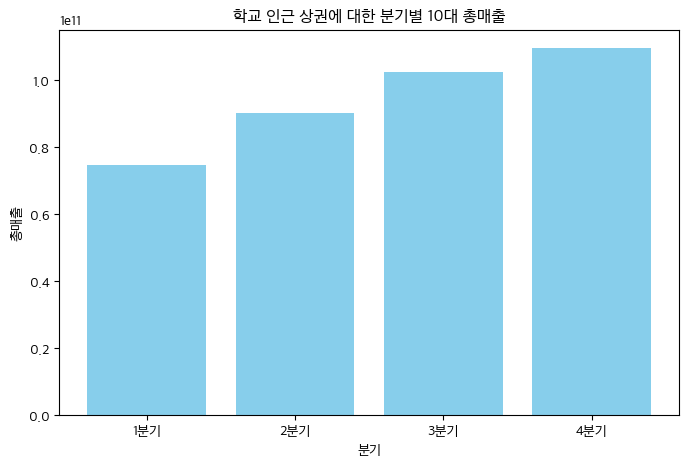

In [56]:
# 학교 인근 상권에 대한 분기별 10대 총매출 데이터 분석

quarters = ['1분기', '2분기', '3분기', '4분기']
total_sales_per_quarter = [markets_near_schools[f'{quarter}_10대_매출'].sum() for quarter in quarters]

plt.figure(figsize=(8, 5))
plt.bar(quarters, total_sales_per_quarter, color='skyblue')
plt.title('학교 인근 상권에 대한 분기별 10대 총매출')
plt.xlabel('분기')
plt.ylabel('총매출')
plt.show()

### 학교 인근 상권에 대한 분기별 10대 총매출 분석 결과

- 2022년 4개의 분기 중에서 4분기 매출이 가장 높다.
- 다만, 분기마다 집계된 매출 데이터 수가 다를 수 있음을 고려할 필요가 있다.

## 분기별 가장 인기 있는 업종

- 매출이 가장 높은 데이터가 인기가 많다고 가정


In [84]:
# 1분기 기준으로 매출 데이터 정렬

markets_near_schools = markets_near_schools.sort_values(by=["1분기_10대_매출"], ascending=False)
print("1분기 결과\n", markets_near_schools[["학교명", "주변_상권_코드_명"]].head(3))

# 2분기 기준으로 매출 데이터 정렬

markets_near_schools = markets_near_schools.sort_values(by=["2분기_10대_매출"], ascending=False)
print("2분기 결과\n", markets_near_schools[["학교명", "주변_상권_코드_명"]].head(3))

# 3분기 기준으로 매출 데이터 정렬

markets_near_schools = markets_near_schools.sort_values(by=["3분기_10대_매출"], ascending=False)
print("3분기 결과\n", markets_near_schools[["학교명", "주변_상권_코드_명"]].head(3))

# 4분기 기준으로 매출 데이터 정렬

markets_near_schools = markets_near_schools.sort_values(by=["4분기_10대_매출"], ascending=False)
print("4분기 결과\n",markets_near_schools[["학교명", "주변_상권_코드_명"]].head(3))


1분기 결과
           학교명 주변_상권_코드_명
555     서일중학교        강남역
968  서울서초초등학교        강남역
874     신상중학교        노원역
2분기 결과
           학교명 주변_상권_코드_명
555     서일중학교        강남역
968  서울서초초등학교        강남역
874     신상중학교        노원역
3분기 결과
           학교명 주변_상권_코드_명
555     서일중학교        강남역
968  서울서초초등학교        강남역
217  서울신천초등학교        잠실역
4분기 결과
           학교명 주변_상권_코드_명
555     서일중학교        강남역
968  서울서초초등학교        강남역
217  서울신천초등학교        잠실역


In [70]:
markets_near_schools = markets_near_schools.sort_values(by=["1분기_10대_매출","2분기_10대_매출","3분기_10대_매출","4분기_10대_매출"], ascending=False)
print("모든 분기 매출 데이터 기준으로 정렬한 결과\n", markets_near_schools["학교명"].head(3))

모든 분기 매출 데이터 기준으로 정렬한 결과
 555       서일중학교
968    서울서초초등학교
874       신상중학교
Name: 학교명, dtype: object


In [71]:
# 분기별 서비스 업종 분석은 check-raw-region-market.csv 참고

In [76]:
def find(sales_data, market_name):
    # total sales of teenagers in certain market 
    market_sales = sales_data[sales_data["상권_코드_명"] == market_name]
    total_sales = market_sales["서비스_업종_코드_명"].value_counts()
    return total_sales

In [81]:
find(sales_q1, "강남역")

자동차미용         1
미용실           1
스포츠 강습        1
세탁소           1
골프연습장         1
피부관리실         1
핸드폰           1
양식음식점         1
네일숍           1
서적            1
가구            1
일반의류          1
운동/경기용품       1
가전제품수리        1
PC방           1
슈퍼마켓          1
화초            1
의약품           1
화장품           1
철물점           1
중식음식점         1
패스트푸드점        1
호프-간이주점       1
일반교습학원        1
치킨전문점         1
제과점           1
시계및귀금속        1
한식음식점         1
가방            1
치과의원          1
컴퓨터및주변장치판매    1
반찬가게          1
의료기기          1
애완동물          1
여관            1
신발            1
전자상거래업        1
외국어학원         1
당구장           1
노래방           1
일식음식점         1
분식전문점         1
커피-음료         1
일반의원          1
한의원           1
스포츠클럽         1
편의점           1
안경            1
문구            1
예술학원          1
Name: 서비스_업종_코드_명, dtype: int64

In [96]:
# 1분기 데이터에서 상권별로 10대 매출 상위 3개 출력

for _, row in markets_near_schools.iterrows():
    market_name = row["주변_상권_코드_명"]
    m = sales_q1[sales_q1["상권_코드_명"] == market_name].sort_values(by='연령대_10_매출_금액')
    print(market_name)
    print(m['서비스_업종_코드_명'].head(3))

1331      자동차미용
1442     가전제품수리
20027       철물점
Name: 서비스_업종_코드_명, dtype: object
1331      자동차미용
1442     가전제품수리
20027       철물점
Name: 서비스_업종_코드_명, dtype: object
721     전자상거래업
1747        안경
1763    시계및귀금속
Name: 서비스_업종_코드_명, dtype: object
721     전자상거래업
1747        안경
1763    시계및귀금속
Name: 서비스_업종_코드_명, dtype: object
1426      세탁소
1658      청과상
2542    골프연습장
Name: 서비스_업종_코드_명, dtype: object
149       피부관리실
469          신발
11050    스포츠 강습
Name: 서비스_업종_코드_명, dtype: object
149       피부관리실
469          신발
11050    스포츠 강습
Name: 서비스_업종_코드_명, dtype: object
179        세탁소
15508      한의원
11670    스포츠클럽
Name: 서비스_업종_코드_명, dtype: object
11762     네일숍
14138    예술학원
18442     핸드폰
Name: 서비스_업종_코드_명, dtype: object
553      의료기기
15509     한의원
15526     당구장
Name: 서비스_업종_코드_명, dtype: object
19733    컴퓨터및주변장치판매
19544           네일숍
664            인테리어
Name: 서비스_업종_코드_명, dtype: object
19733    컴퓨터및주변장치판매
19544           네일숍
664            인테리어
Name: 서비스_업종_코드_명, dtype: object
15532    골프연습장
1664       청과상
3